In [36]:
import re
import glob
import matplotlib.pyplot as plt

# Experiment #1: No. of Convolution Layers in CNN

In [37]:
def extract_numbers_from_file(filename):
    """
    Takes in name of log file and extracts numbers based on occurence of keywords like "Training Loss",
    and "Validation Loss".As contents of log files are formatted the same way, can extract the numbers
    based on their positions in the each line/string.
    Returns the number of epochs, training losses, training accuracies, validation losses, validation accuracies as separate lists.
    """
    
    file = open(filename, "r")
    epochs = []
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    for line in file.readlines():
        train = re.findall("Training Loss.*|$", line) #finds "Training Loss" in line and stores in train variable
        if len(train) > 2:
            train = train[0].split() #split string into list of words/characters delimited by whitespace
            epoch_no = float(train[4][:-1]) #takes 5th element of list as epoch number. removes last colon character and convert to float
            epochs.append(epoch_no)
            train_loss = float(train[5]) #takes 6th element of list as training loss and convert to float
            train_losses.append(train_loss)
            train_acc = float(train[8][:-1]) #takes 9th element of list as training accuracy. removes last % character and convert to float
            train_accs.append(train_acc)

        val = re.findall("Validation Loss.*|$", line) #finds "Validation Loss" in line and stores in val variable
        if len(val) > 2:
            val = val[0].split() #split string into list of words/characters delimited by whitespace
            val_loss = float(val[5]) #takes 6th element of list as validation loss and convert to float
            val_losses.append(val_loss)
            val_acc = float(val[8][:-1]) #takes 9th element of list as validation accuracy. removes last % character and convert to float
            val_accs.append(val_acc)
    return epochs, train_losses, train_accs, val_losses, val_accs

In [38]:
# Example of how to run extract_numbers_from_file code
trial_logfile = "dev_model/log/cnn_lstm_512_6_1_512_drop25.log"
extract_numbers_from_file(trial_logfile)

([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0],
 [2.303717,
  2.266218,
  2.18176,
  1.950077,
  1.516864,
  1.096868,
  0.981877,
  0.943166,
  0.864507,
  0.826622,
  0.815658],
 [10.14, 23.25, 38.62, 40.39, 53.82, 74.98, 81.26, 83.99, 87.13, 86.73, 87.85],
 [2.305495,
  2.307356,
  2.315972,
  2.480226,
  2.600204,
  2.44879,
  2.47412,
  2.49723,
  2.452426,
  2.519527,
  2.519811],
 [9.79, 10.31, 7.22, 7.73, 10.31, 13.92, 10.82, 13.92, 13.4, 11.86, 10.82])

In [63]:
def plot_graphs(general_filepath, experiment_name):
    """
    Takes in experiment name and general file path.
    General file path is used to produce a list of files with shared general file paths.
    Experiment name is used to identify legend labels from dictionary stored within the function,
    and to extract the necessary files from the list of files with shared general file paths.
    Calls on the extract_numbers_from_files for each file.
    Plots 4 subplots for training accuracy, training loss, validation accuracy and validation loss.
    """
    
    dictionary = {'No. of Convo Layers in CNN': [2,3,4,5,6],
                 'Dropout Rate of Latent Vector': [0.1, 0.25, 0.50, 0.80],
                 'Weight Decay of Optimizer': [0, '1e^-5', '1e^-6', '1e^-7', '1e^-8'],
                 'Attention (CNN-LSTM)': ['w/o attention', 'w/ attention'],
                 'Bidirectional': ['not bidirectional', 'bidirectional'],
                 'Attention (VGG11-LSTM)': ['w/o attention', 'w/ attention']} #dictionary that stores legend labels for each experiment
    files = glob.glob(general_filepath, recursive = True) #returns list of of files that share the general file paths
    files = sorted(files) #sorts the list of files
    # the following if, elif statements truncates the list of files to only
    # include the files that are needed for the given experiment name
    if experiment_name == 'Dropout Rate of Latent Vector':
        files = files[:4] 
    elif experiment_name == 'Weight Decay of Optimizer':
        files = sorted(files[-4:]+[files[0]])
    elif experiment_name == 'Attention (CNN-LSTM)':
        files = files[:2]
    print(files) #prints out the filenames to corroborate with the README.md 
    fig, axs = plt.subplots(2, 2, figsize = (15, 15)) #instantiate the 4 subplots
    fig.suptitle(experiment_name, fontsize = 25, fontweight = 'bold')
    for file in files: #for each file, plot graphs on the 4 subplots so that the result is 4 subplots with different lines for different files.
        index = files.index(file)
        legend = dictionary[experiment_name][index] 
        epochs, train_losses, train_accs, val_losses, val_accs = extract_numbers_from_file(file)
        axs[0, 0].plot(epochs, train_losses, label = legend)
        axs[0, 0].set_ylabel("average training loss", fontsize = 15)
        axs[0, 0].set_xlabel("epoch number", fontsize = 15)
        axs[0, 0].legend(loc="upper right")
        axs[0, 1].plot(epochs, train_accs, label = legend)
        axs[0, 1].set_ylabel("average training accuracy", fontsize = 15)
        axs[0, 1].set_xlabel("epoch number", fontsize = 15)
        axs[0, 1].legend(loc="upper right")
        axs[1, 0].plot(epochs, val_losses, label = legend)
        axs[1, 0].set_ylabel("average validation loss", fontsize = 15)
        axs[1, 0].set_xlabel("epoch number", fontsize = 15)
        axs[1, 0].legend(loc="upper right")
        axs[1, 1].plot(epochs, val_accs, label = legend)
        axs[1, 1].set_ylabel("average validation accuracy", fontsize = 15)
        axs[1, 1].set_xlabel("epoch number", fontsize = 15)
        axs[1, 1].legend(loc="upper right")


['log/cnn_lstm_512_2_1_512.log', 'log/cnn_lstm_512_3_1_512.log', 'log/cnn_lstm_512_4_1_512.log', 'log/cnn_lstm_512_5_1_512.log', 'log/cnn_lstm_512_6_1_512.log']


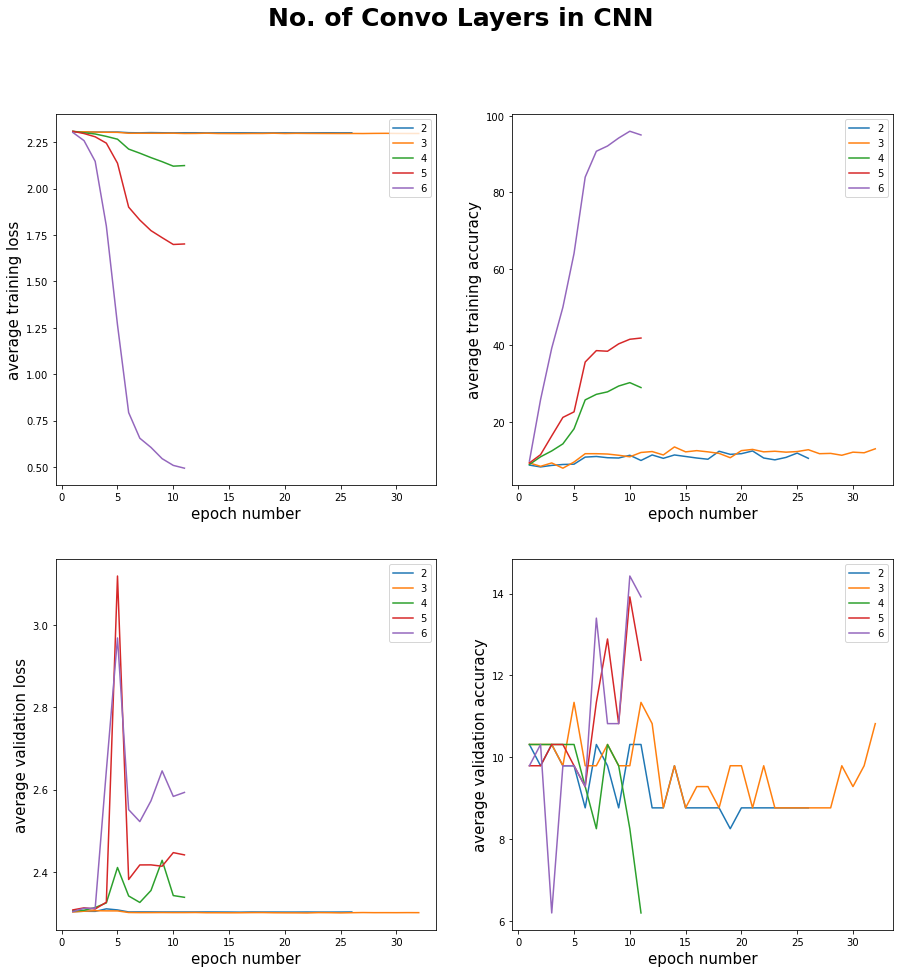

In [64]:
plot_graphs('dev_model/log/cnn_lstm_512_*_1_512.log', 'No. of Convo Layers in CNN')

['log/cnn_lstm_512_6_1_512_drop80.log', 'log/cnn_lstm_512_6_1_512_drop80_weightd5.log', 'log/cnn_lstm_512_6_1_512_drop80_weightd6.log', 'log/cnn_lstm_512_6_1_512_drop80_weightd7.log', 'log/cnn_lstm_512_6_1_512_drop80_weightd8.log']


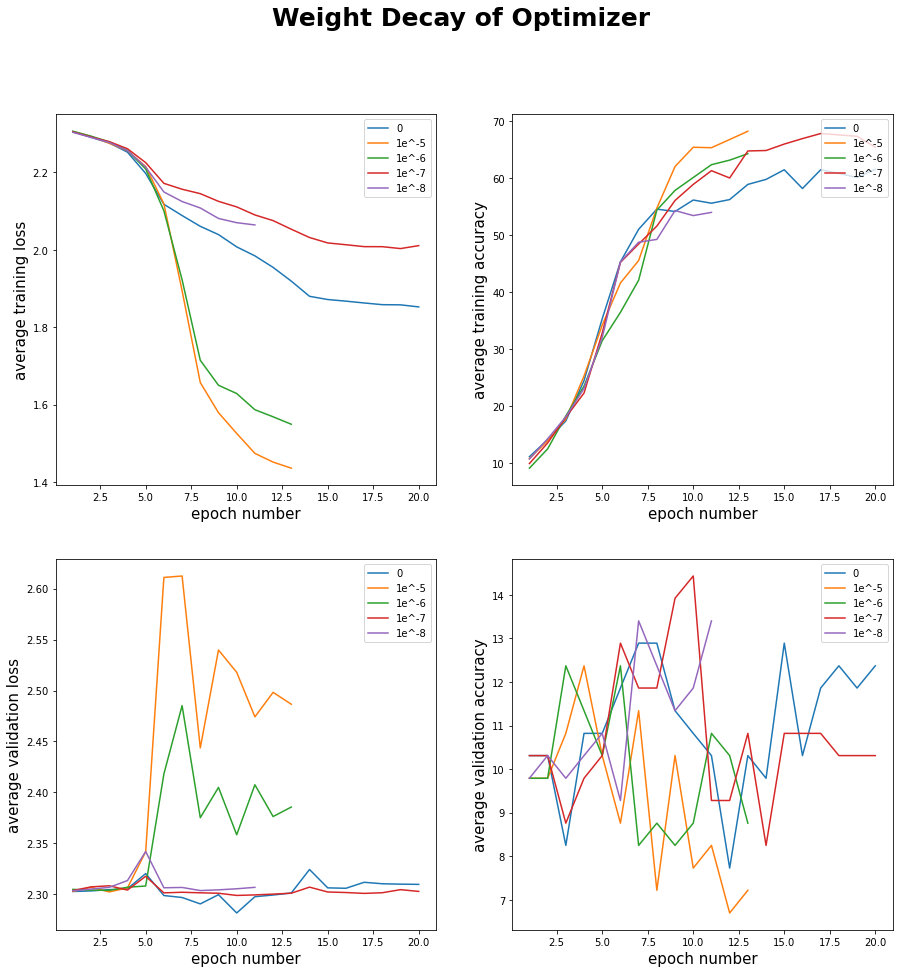

In [65]:
plot_graphs('dev_model/log/cnn_lstm_512_6_1_512_drop80*.log', 'Weight Decay of Optimizer')

['log/cnn_lstm_512_6_1_512.log', 'log/cnn_lstm_512_6_1_512_drop25.log', 'log/cnn_lstm_512_6_1_512_drop50.log', 'log/cnn_lstm_512_6_1_512_drop80.log']


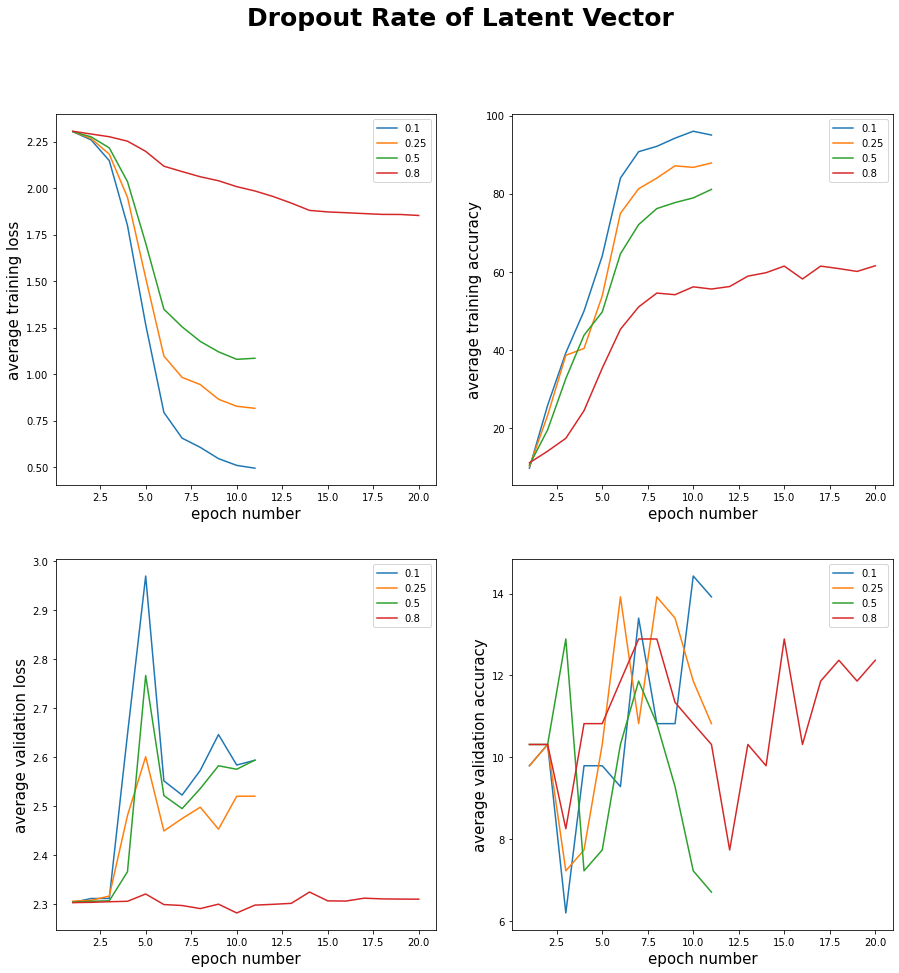

In [66]:
plot_graphs('dev_model/log/cnn_lstm_512_6_1_512*.log', 'Dropout Rate of Latent Vector')

['log/cnn_lstm_512_6_1_512_drop80.log', 'log/cnn_lstm_512_6_1_512_drop80_attn.log']


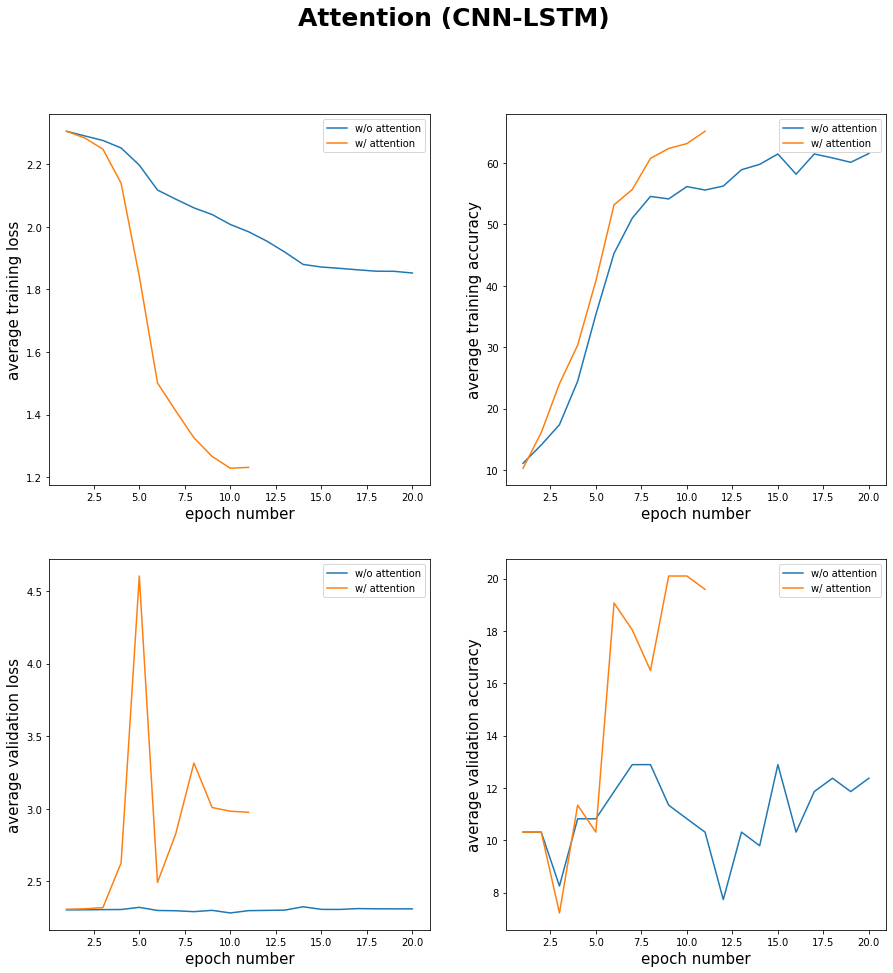

In [67]:
plot_graphs('dev_model/log/cnn_lstm_512_6_1_512_drop80*.log', 'Attention (CNN-LSTM)')

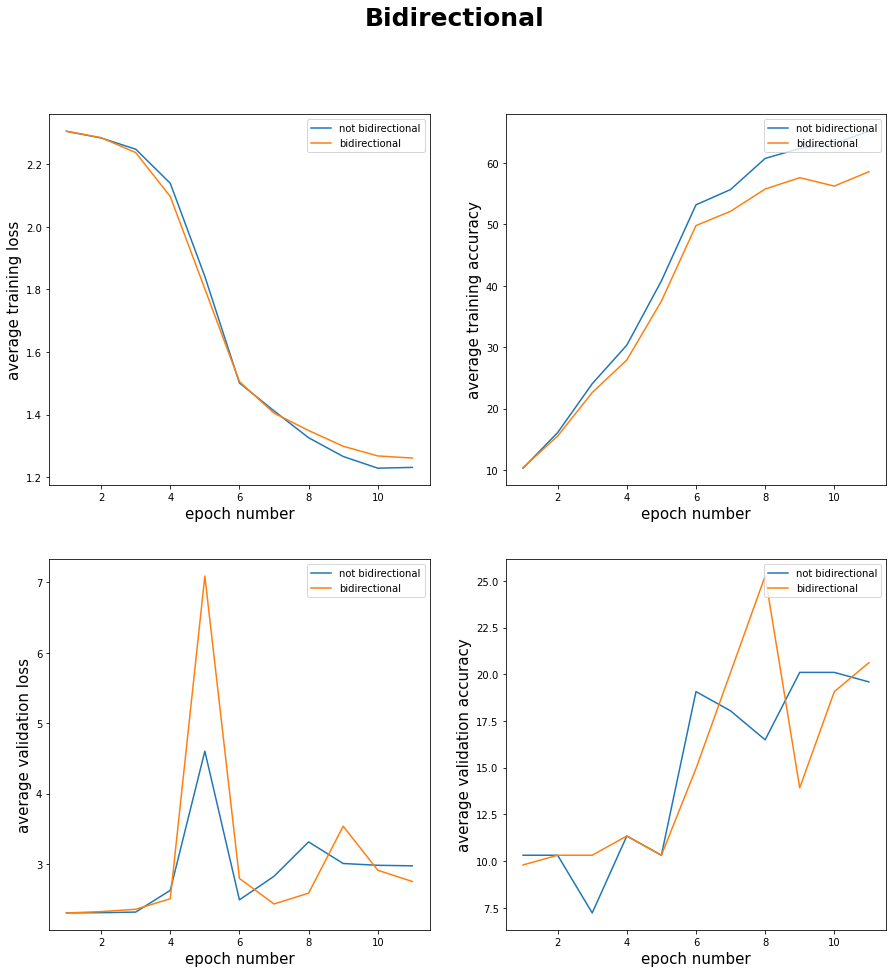

In [60]:
plot_graphs('dev_model/log/cnn_lstm_512_6_1_512_drop80_attn*.log', 'Bidirectional')

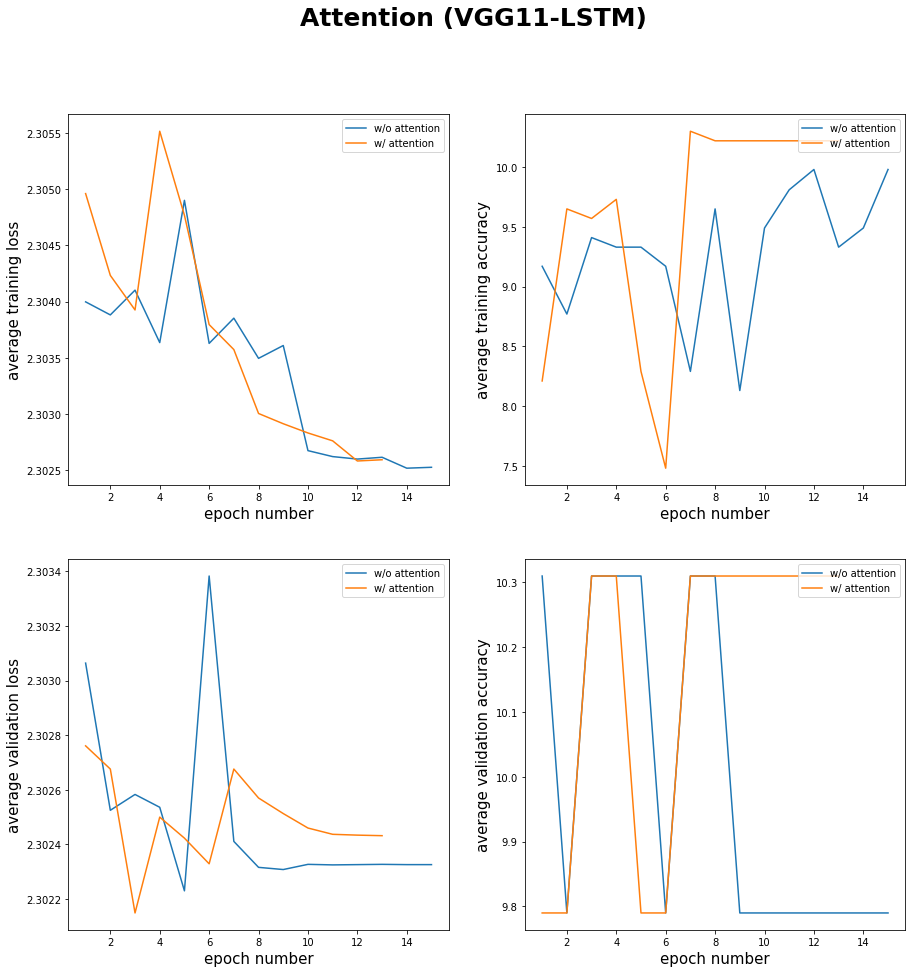

In [61]:
plot_graphs('dev_model/log/vgg11_lstm_512_2_512*.log','Attention (VGG11-LSTM)')